# Emotion Detector

This notebook will train a neural network to detect six types of emotions (*Angry*, *Disgust*., *Fear*, *Happy*, *Sad*, *Surprise*) plus a neutral expression in human faces. The approach is similar to the [Kaggle challenge](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/overview) proposed seven years ago. The network and data loaders were build in [PyTorch](https://pytorch.org/).

## Prepare the data
We use the [FER2013](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data) dataset to train our model. First off, teh dataset has to be downloaded. For a cleaner routine, we provide a PyTorch Dataset implementation for the dataset. Thus, the first step is to create such a Dataset object and a DataLoader. To have a quick look at the data and ensure that everything went well, we display the first entries from the training set with their labels.

In [76]:
from fer2013 import FER2013
import network as n
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

data_root = 'fer2013_data'

# Create and inspect data
train_dataset = FER2013(data_root)
test_dataset = FER2013(data_root, train=False)
print("No of training samples:", len(train_dataset))
print("No of test samples:", len(test_dataset))

# Make data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=97, shuffle=False)


%load_ext autoreload
%autoreload 2

No of training samples: 28709
No of test samples: 7178
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


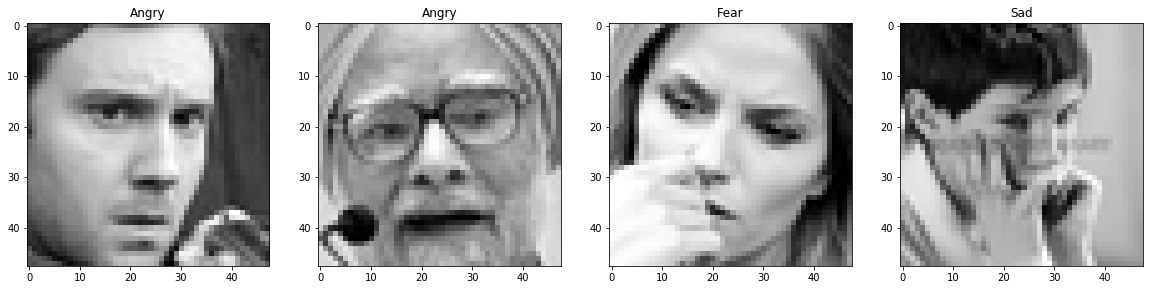

In [77]:
# Display the data
fig, ax = plt.subplots(1,4, figsize=(20, 5))
for i in range(4):
    img, emotion = train_dataset.__getitem__(i)
    ax[i].imshow(img.reshape(48, 48), cmap='gray')
    ax[i].set_title(train_dataset.labels[emotion])
plt.show()

## Train the network

In [80]:
import torch
from tqdm import tqdm

use_cuda = torch.cuda.is_available()
print("Use cuda:", use_cuda)
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
device = torch.device("cuda" if use_cuda else "cpu")

model = n.EmotionClassifier().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=10e-6)
loss_function = torch.nn.MSELoss()
loss_history = []

for epoch in range(20):
    print("Epoch", epoch+1)
    for imgs, emos in tqdm(train_loader):
        data = imgs.to(device)
        optimizer.zero_grad()
        predictions = model(data)
        loss = loss_function(torch.argmax(predictions, dim+1, emos))
        loss.backward()
        loss_history.append(loss.item())
        optimizer.step()

  0%|          | 0/225 [00:00<?, ?it/s]

Use cuda: True
Epoch 1


RuntimeError: size mismatch, m1: [128 x 12544], m2: [20736 x 1024] at /pytorch/aten/src/THC/generic/THCTensorMathBlas.cu:290